### Étude de la complexité des algorithmes de tri - BEAUJARD Traïan

## Sommaire

- [I/Introduction](#I/Introduction)
    - [Complexité en temps](#complexité-en-temps)
    - [Complexité en espace](#complexité-en-espace)
    - [Cas meilleurs, pires, et moyens](#cas-meilleurs-pires-et-moyens)
    - [Présentation du projet](#présentation-du-projet)
- [II/Analyse des algorithmes](#iianalyse-des-algorithmes)
    - [Bubble Sort](#bubble-sort)
    - [Selection Sort](#selection-sort)
    - [Insertion Sort](#section-1-introduction)
    - [Heap Sort](#section-1-introduction)
    - [Quick Sort](#section-1-introduction)
    - [Merge Sort](#section-1-introduction)

- [III/Comparaison des algorithmes](#section-1-introduction)

- [IV/Bonnes pratiques](#section-1-introduction)

# I/Introduction

La **complexité algorithmique** est une mesure de la performance d'un algorithme, exprimée en fonction de la taille de l'entrée.
<br> → Elle permet d'évaluer le **temps** (ou le nombre d'opérations) nécessaire pour exécuter un algorithme donné. 

## Complexité en temps

La **complexité en temps** mesure le nombre d'opérations élémentaires que l'algorithme doit effectuer en fonction de la taille de l'entrée. Elle est généralement exprimée en **notation Big-O** (O), qui décrit le comportement asymptotique de l'algorithme lorsque la taille des données tend vers l'infini.

Voici différentes complexités :

- **O(1)** : Complexité constante — le temps d'exécution ne dépend pas de la taille des données.
- **O(log n)** : Complexité logarithmique — le temps d'exécution croît logarithmiquement avec la taille des données.
- **O(n)** : Complexité linéaire — le temps d'exécution croît linéairement avec la taille des données.
- **O(n log n)** : Complexité linéarithmique — le temps d'exécution croît proportionnellement à la taille des données multipliée par le logarithme de cette taille.
- **O(n²)** : Complexité quadratique — le temps d'exécution croît proportionnellement au carré de la taille des données.
- **O(2^n)** : Complexité exponentielle — le temps d'exécution double à chaque ajout d'élément dans l'entrée.

<img src="imgs/graph_time_complexity.jpg" alt="graph_complexity" width="400" /> [source de l'image](https://sumeetpanchal-21.medium.com/exploring-java-code-samples-understanding-time-complexity-and-outputs-cad12e57ac4b)


## Complexité en espace

La **complexité en espace** fait référence à la quantité de mémoire supplémentaire utilisée par l'algorithme par rapport à la taille de l'entrée. 

## Cas meilleurs, pires et moyens

Chaque algorithme peut avoir trois scénarios de performances en fonction de la structure des données d'entrée :
- **Meilleur cas** : → un temps d'exécution minimal.
- **Pire cas** : → temps d'exécution maximal.
- **Cas moyen** : → la performance moyenne de l'algorithme sur un grand nombre d'exécutions avec des données d'entrée différentes.

## Présentation du projet

La complexité permet de **comparer différents algorithmes** et d'en choisir un qui est le plus adapté à un contexte donné.
Nous allons comparer ces différentes complexités et les performances de 6 algorithmes de tri sur différents types de tableaux.


Le centre du projet est la classe SortBenchmark :


In [ ]:
from projet_BEAUJARD_Traian import *

algorithms=[
    BubbleSort(), 
    SelectionSort(), 
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['random', 'sorted', 'inverted'], 
    n_runs=1, 
    show_plots=True)

benchmark.run()

dont les paramètres sont :
- `algorithms` : Une liste d'algorithmes parmi : Bubble Sort, Selection Sort, Insertion Sort, Heap Sort, Quick Sort, Merge Sort.
- `nlist` : Nombre de listes à trier (croissant de `nval` par liste).
- `types_to_sort` : Types de listes à trier (par exemple, ordonnées, inversées, aléatoires).
- `n_runs` : Nombre de fois que l'on souhaite exécuter le benchmark pour obtenir des moyennes fiables.
- `show_plots` : Décide si l'on affiche (`True`) ou sauvegarde (`False`) les graphiques générés.

Le code va afficher 3 graphiques avec en courbe chaque algorithme avec chacune des listes :
- Un graphique montrant la **complexité en temps** (Sur l'ordonnée on aura le nombre de secondes écoulées).
- Un graphique montrant la **complexité en temps** mais avec le nombre d'opérations (Sur l'ordonnée on aura le nombre d'opérationd').
- Un graphique montrant la **complexité en espace** (Sur l'ordonnée on aura la mémoire utilisée). *

► * A noter que l'exécution depuis le notebook peut causer des "sauts" dans les graphiques des valeurs de mémoire utilisée. Je tenais quand même à garder ces graphiques car la mémoire utilisée est une information pertinente dans la comparaison des algos.

# II/Analyse des algorithmes

## Bubble Sort

Tant que la liste n'est pas triée, cet algo parcourt plusieurs fois la liste, compare les éléments adjacents et les échange s'ils ne sont pas dans le bon ordre.

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Bubble Sort     | $O(n)$      | $O(n^2)$    | $O(n^2)$      |

**Meilleur Cas : $O(n)$**

La liste est déjà triée.
- **Nombre de Comparaisons** : $n - 1$
- **Nombre d'Échanges** : 0
-
  $$
  T(n) = O(n)
  $$

**Cas Moyen : $O(n^2)$**

Les éléments sont dans un ordre aléatoire.
- L'algorithme effectue environ $ \frac{n(n - 1)}{2} $ comparaisons et échanges.
- 
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

**Pire Cas : $O(n^2)$**

La liste est triée dans l'ordre inverse.
  - Le nombre maximum de comparaisons et d'échanges est atteint.
-
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

*Exécuter le code ci-dessous pour voir le benchmark de cet algo.*

In [ ]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[BubbleSort()], nlist=50, nval=50, types_to_sort=['random', 'sorted', 'inverted'], n_runs=1, show_plots=True)
benchmark.run()


Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution :
    - Tableau trié (meilleur cas) : le temps est minimal, correspondant à une complexité de O(n).
    - Tableau aléatoire (cas moyen) : le temps suit une courbe quadratique, confirmant la complexité O(n²).
    - Tableau inversé (pire cas) : le temps est le plus élevé, conforme à O(n²).
    - Globalement, le temps d'exécution est très long.

- Nombre d'opérations :
    - Même tendance, avec un nombre d'opérations linéaire pour le meilleur cas, et quadratique pour les autres, validant les complexités théoriques.
    - Globalement, le nombre d'opérations effectuées est très grand.

- Mémoire utilisée :
    - Entre 300 et 350 octets. Faible consommation en espace, typique de l'algorithme in-place. C'est-à-dire qu'il trie les données directement dans le tableau d'origine sans utiliser d'espace supplémentaire significatif, à part quelques variables temporaires.

## Selection Sort

Cet algo divise la liste en une région triée et une région non triée. Il sélectionne à chaque itération l'élément minimum de la région non triée et l'échange avec le premier élément non trié.

**Meilleur Cas : $O(n^2)$**
Quel que soit l'ordre initial.
  - Le Selection Sort effectue toujours le même nombre de comparaisons, quelle que soit l'ordre initial de la liste.
  - **Nombre de Comparaisons** : $ \frac{n(n - 1)}{2} $
  - **Nombre d'Échanges** : $n - 1$
- 
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

**Cas Moyen et Pire Cas: $O(n^2)$**

Les éléments sont dans un ordre aléatoire ou triés.
  - Comme pour le meilleur cas, le nombre de comparaisons et d'échanges reste le même.
- 
  $$
  T(n) = O(n^2)
  $$


Benchmark 1 / 1
Exécution de Selection Sort


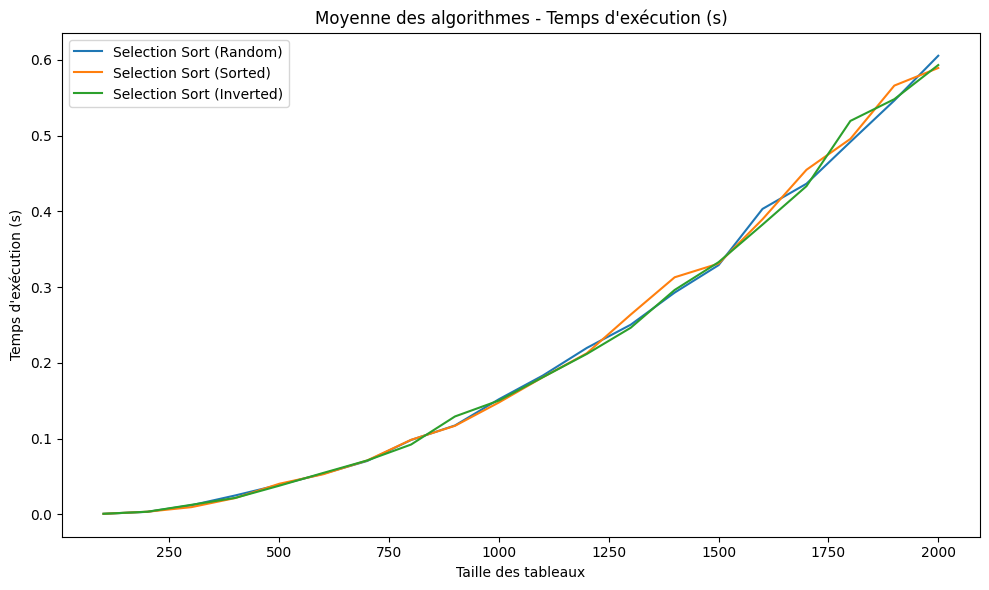

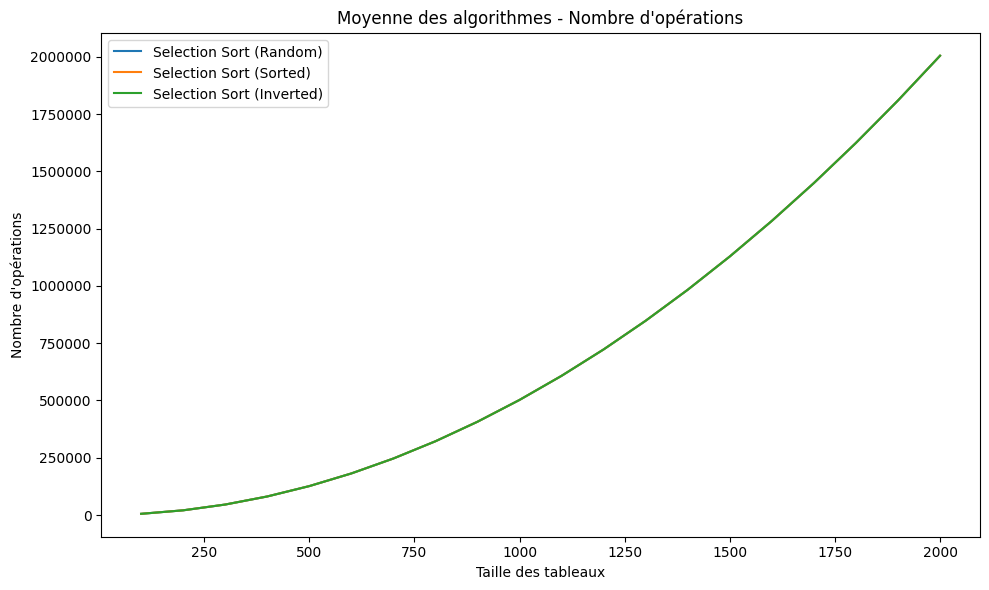

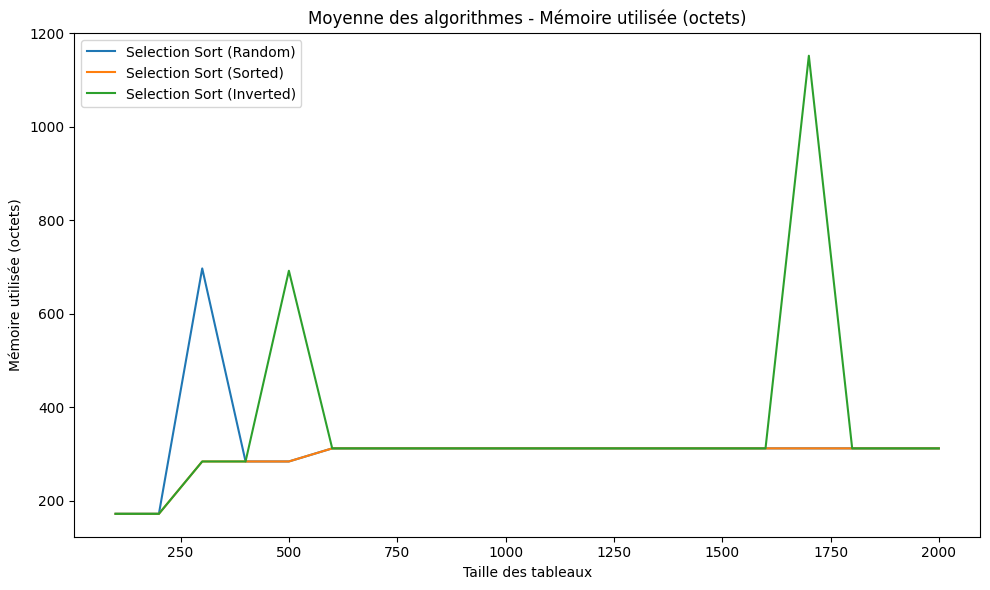

In [8]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[SelectionSort()], nlist=20, nval=100, types_to_sort=['random', 'sorted', 'inverted'], n_runs=1, show_plots=True)
benchmark.run()


Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution et Nombre d'opérations:
    - Peu importe la liste, les courbes sont identiques et quadratiques.

- Mémoire utilisée :
    - Entre 300 et 350 octets. Faible consommation en espace, typique de l'algorithme in-place.